# Estadistica Inferencial

## Imports y lectura

In [74]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import scipy

import matplotlib.pyplot as plt

import libraryFunc.libFunc as lib

import warnings
warnings.simplefilter('ignore')

#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


In [75]:
df = pd.read_csv("../data/cleaned/data.csv")


## Descripcion del dataframe

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   652 non-null    int64  
 1   Individuo                    652 non-null    object 
 2   talla                        652 non-null    float64
 3   edad                         652 non-null    float64
 4   peso_kg                      652 non-null    float64
 5   circun_cuello                652 non-null    float64
 6   IMC                          652 non-null    float64
 7   circun_cintura               652 non-null    float64
 8   cadera                       652 non-null    float64
 9   ind_cintura_cadera           652 non-null    float64
 10  ind_cintura_estatura         652 non-null    float64
 11  por_grasa_corporal           652 non-null    float64
 12  masa_corporal_magra_kg       652 non-null    float64
 13  pliegue_cutaneo_BICE

## Seleccion de variables

In [85]:
# Suponemos que df es tu DataFrame
variables = ["talla", "peso_kg", "IMC", "circun_cintura", "cadera"]
stats = df[variables].describe()
stats

,talla,peso_kg,IMC,circun_cintura,cadera
count,652.000000,652.000000,652.000000,652.000000,652.000000
mean,158.794785,56.903221,22.421825,74.496319,89.861810
std,7.316419,8.442418,3.018874,6.837227,7.183395
min,135.600000,33.900000,14.537886,55.000000,69.800000
25%,153.800000,51.200000,20.306828,70.000000,85.000000
50%,158.200000,55.800000,22.174447,73.600000,89.000000
75%,163.300000,61.450000,23.855081,78.000000,94.000000
max,188.600000,91.100000,36.708603,107.500000,120.800000


In [86]:
subdf = df[variables]
subdf.head()

,talla,peso_kg,IMC,circun_cintura,cadera
0,155.7,71.2,29.576170,90.0,98.0
1,166.5,61.0,22.364707,80.9,100.5
2,151.3,49.1,21.623567,72.0,86.0
3,151.7,54.6,23.117479,73.6,88.4
4,160.3,58.0,22.260196,73.6,97.9


In [87]:
subdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talla           652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   circun_cintura  652 non-null    float64
 4   cadera          652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


## Pruebas de normalidad

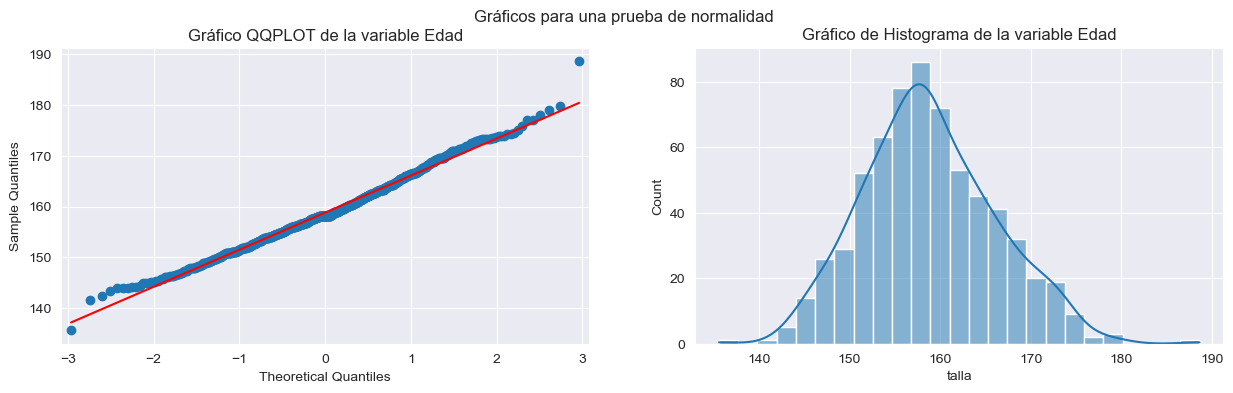

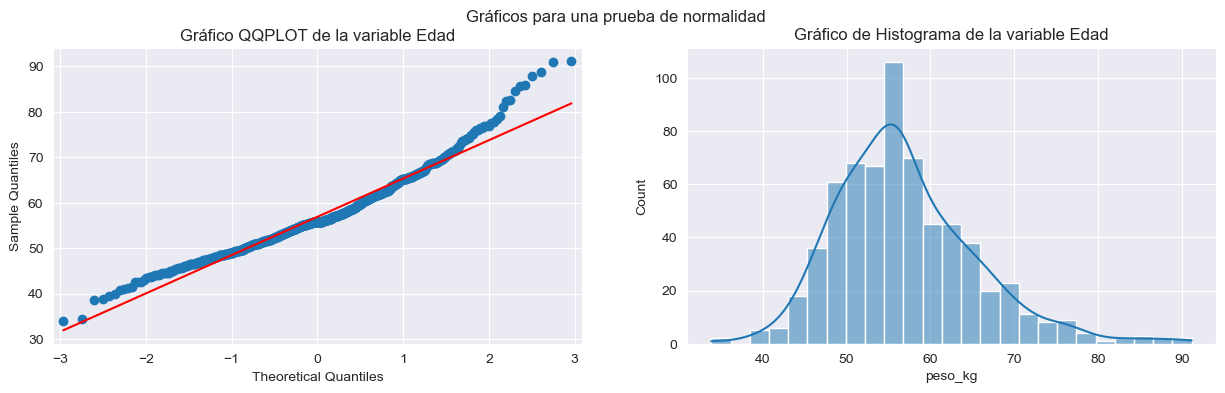

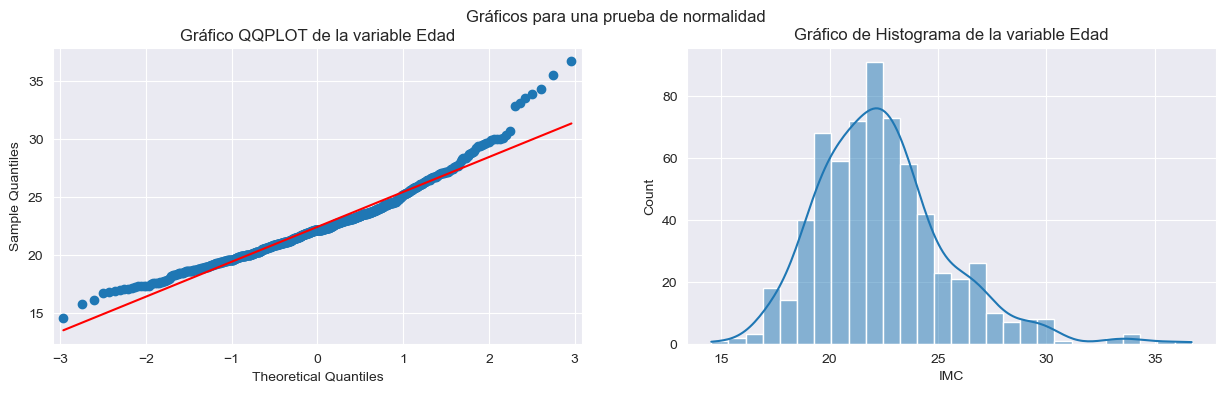

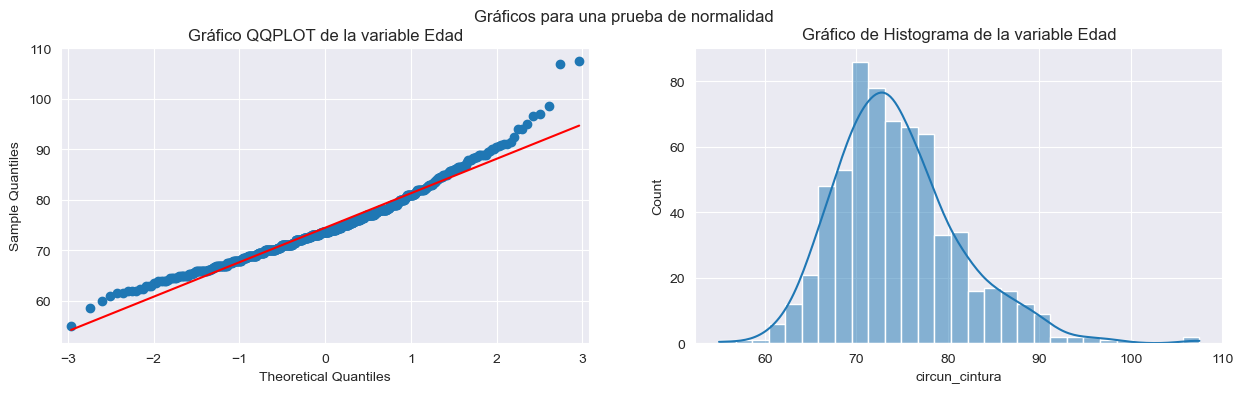

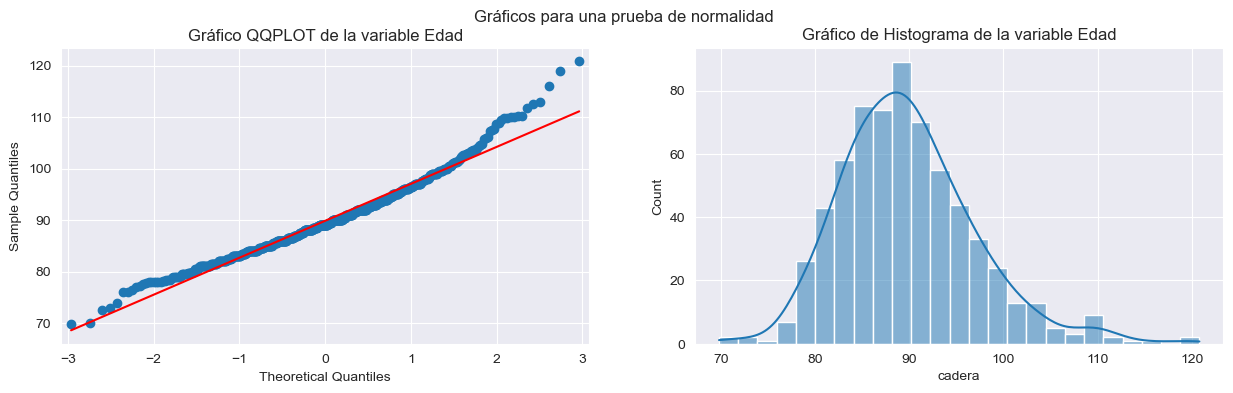

In [88]:
for i, colum in enumerate(variables):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3.84))  # 1 Fila [0]
    fig.suptitle('Gráficos para una prueba de normalidad')

    axes[0].set_title('Gráfico QQPLOT de la variable Edad')
    axes[1].set_title('Gráfico de Histograma de la variable Edad')

    qqplot(subdf[colum] , line='s', ax=axes[0])
    sns.histplot(x=colum, data=subdf, ax=axes[1], kde= True)
    plt.show()

In [89]:
for i, colum in enumerate(variables):
    stat, p = shapiro(subdf[colum])
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat, p))

    stat2, p2 = kstest(subdf[colum], 'norm')
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

talla - Estadisticos=0.993, p-value=0.003
talla - Estadisticos=1.000, p-value=0.000
peso_kg - Estadisticos=0.961, p-value=0.000
peso_kg - Estadisticos=1.000, p-value=0.000
IMC - Estadisticos=0.956, p-value=0.000
IMC - Estadisticos=1.000, p-value=0.000
circun_cintura - Estadisticos=0.963, p-value=0.000
circun_cintura - Estadisticos=1.000, p-value=0.000
cadera - Estadisticos=0.972, p-value=0.000
cadera - Estadisticos=1.000, p-value=0.000


## Normalizacion de datos

In [90]:
scaler = MinMaxScaler()
data_riesgo_num2_norm = scaler.fit_transform(subdf)
data_riesgo_num2_norm

array([[0.37924528, 0.6520979 , 0.67829486, 0.66666667, 0.55294118],
       [0.58301887, 0.47377622, 0.35302515, 0.49333333, 0.60196078],
       [0.29622642, 0.26573427, 0.31959639, 0.32380952, 0.31764706],
       ...,
       [0.34716981, 0.43706294, 0.37128037, 0.57142857, 0.51372549],
       [0.73018868, 0.95804196, 0.56317691, 0.58666667, 0.61176471],
       [0.42264151, 0.41433566, 0.38498255, 0.43809524, 0.4745098 ]])

In [93]:
subdf_norm = pd.DataFrame(
    data=subdf,
    columns=["talla", "peso_kg", "IMC", "circun_cintura", "cadera"])
subdf_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talla           652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   circun_cintura  652 non-null    float64
 4   cadera          652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


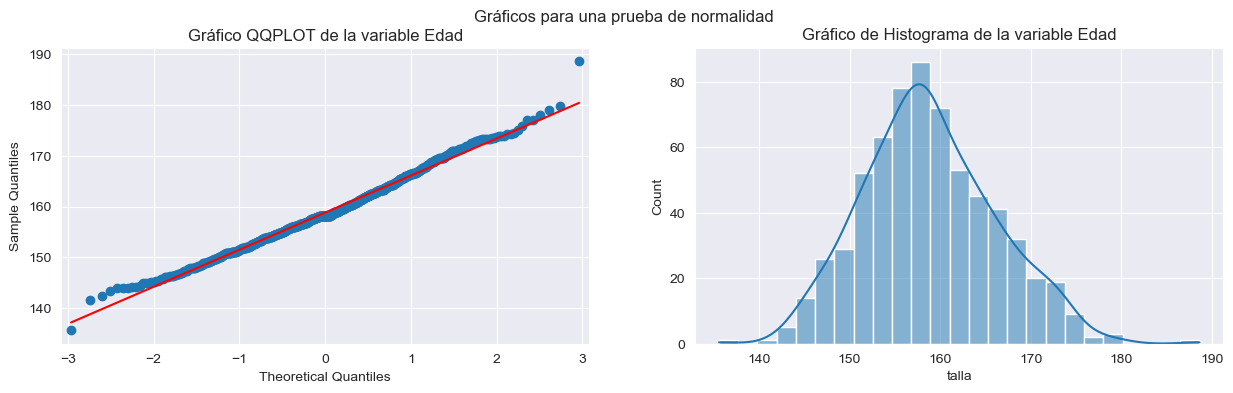

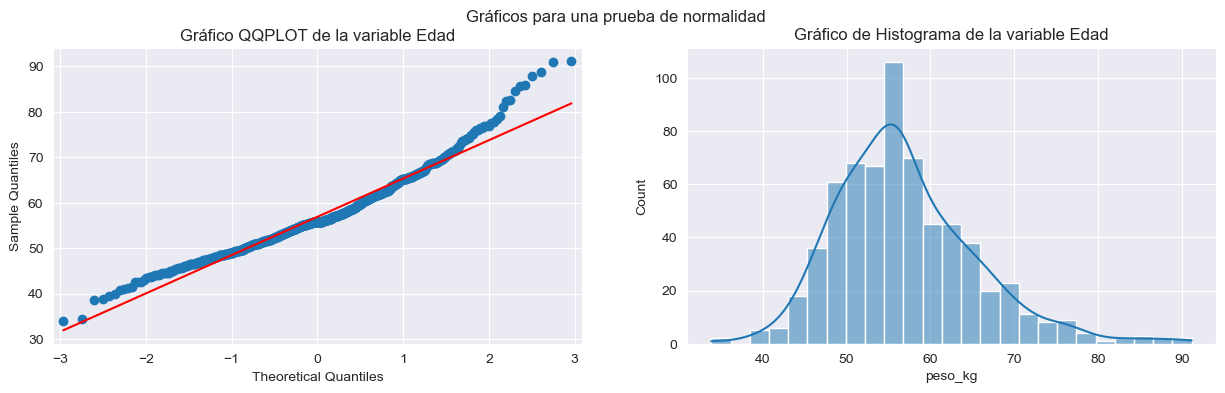

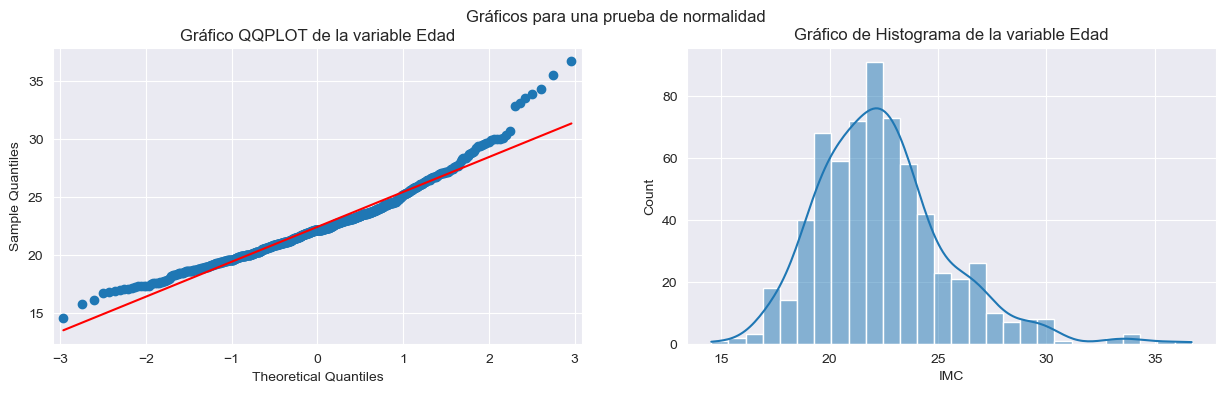

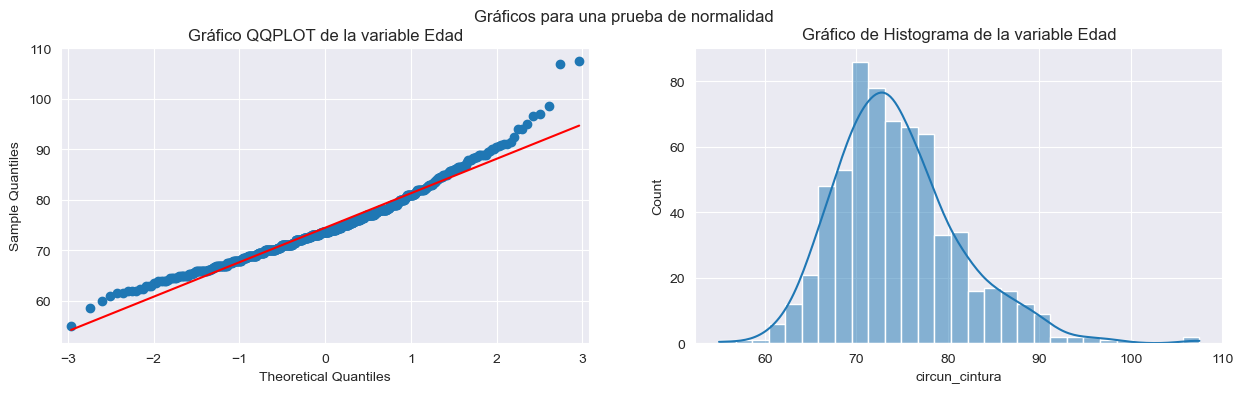

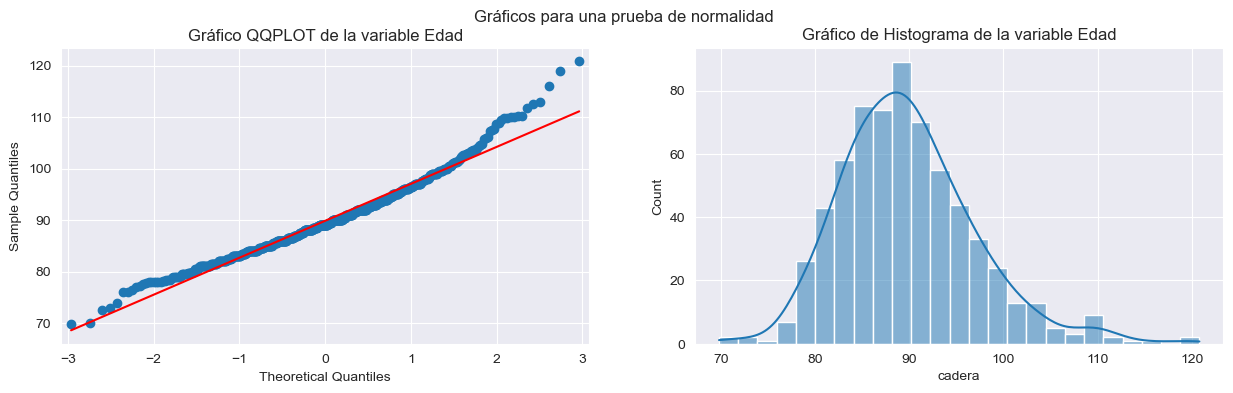

In [94]:
for i, colum in enumerate(variables):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3.84))  # 1 Fila [0]
    fig.suptitle('Gráficos para una prueba de normalidad')

    axes[0].set_title('Gráfico QQPLOT de la variable Edad')
    axes[1].set_title('Gráfico de Histograma de la variable Edad')

    qqplot(subdf_norm[colum] , line='s', ax=axes[0])
    sns.histplot(x=colum, data=subdf_norm, ax=axes[1], kde= True)
    plt.show()

In [95]:
for i, colum in enumerate(variables):
    stat, p = shapiro(subdf_norm[colum])
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat, p))

    stat2, p2 = kstest(subdf_norm[colum], 'norm')
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

talla - Estadisticos=0.993, p-value=0.003
talla - Estadisticos=1.000, p-value=0.000
peso_kg - Estadisticos=0.961, p-value=0.000
peso_kg - Estadisticos=1.000, p-value=0.000
IMC - Estadisticos=0.956, p-value=0.000
IMC - Estadisticos=1.000, p-value=0.000
circun_cintura - Estadisticos=0.963, p-value=0.000
circun_cintura - Estadisticos=1.000, p-value=0.000
cadera - Estadisticos=0.972, p-value=0.000
cadera - Estadisticos=1.000, p-value=0.000


## Estandarizacion de variables

In [ ]:
subdf_stdr = zscore(subdf, axis=1)
subdf_stdr

In [96]:
subdf_stdr = pd.DataFrame(
    data=subdf,
    columns=["talla","peso_kg", "IMC", "circun_cintura", "cadera"])
subdf_stdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talla           652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   circun_cintura  652 non-null    float64
 4   cadera          652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


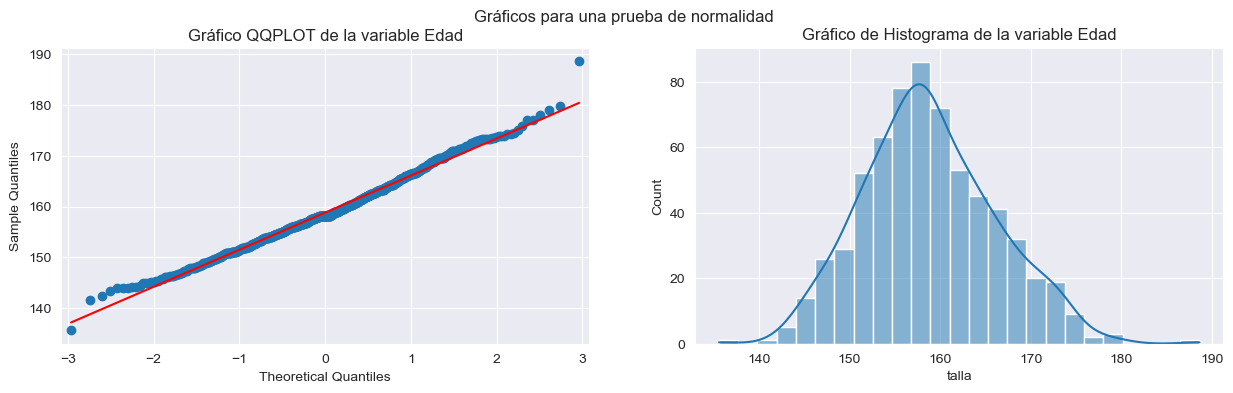

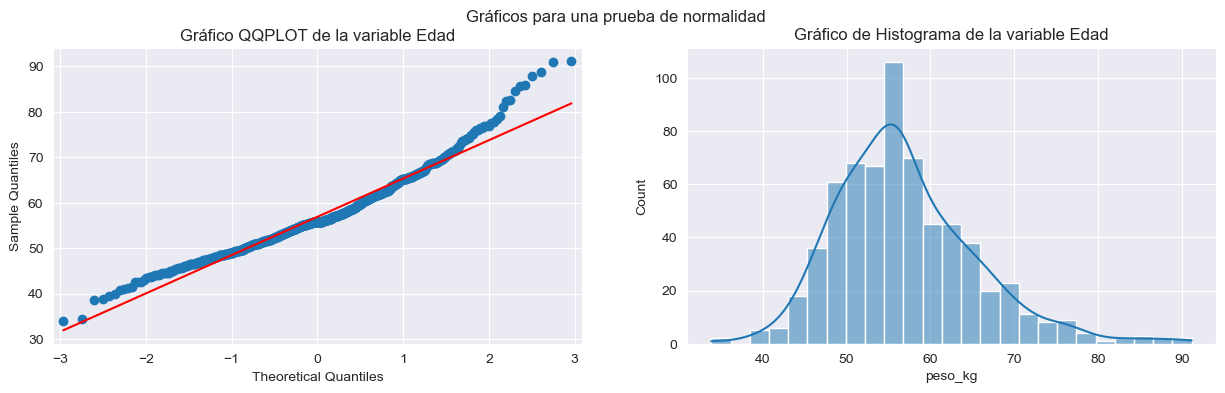

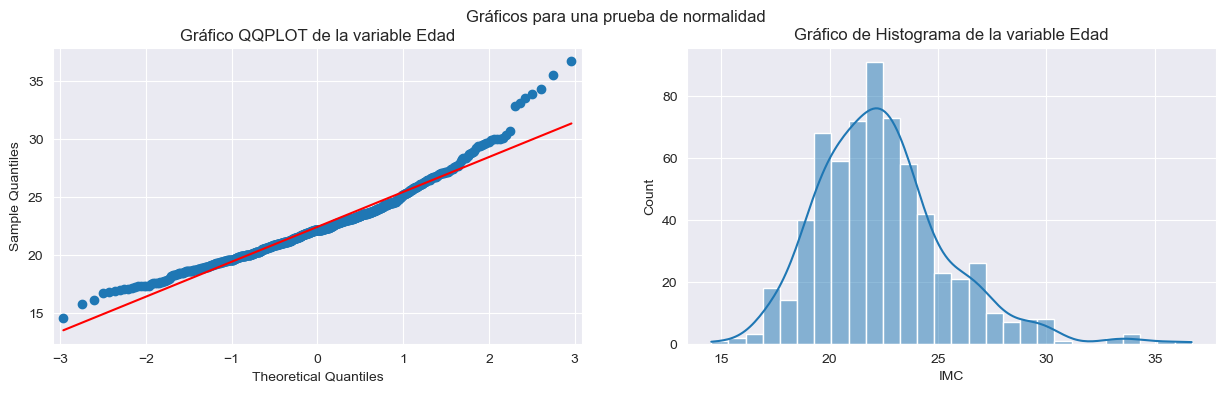

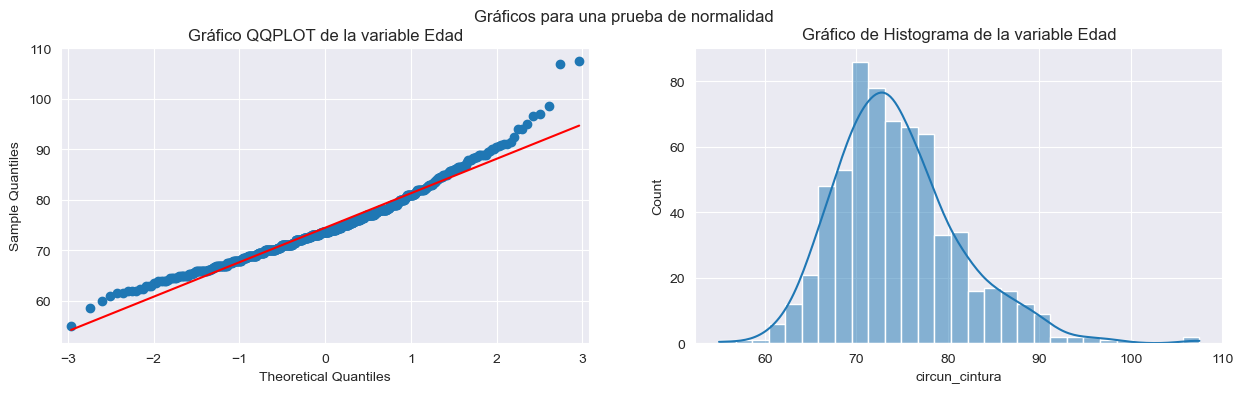

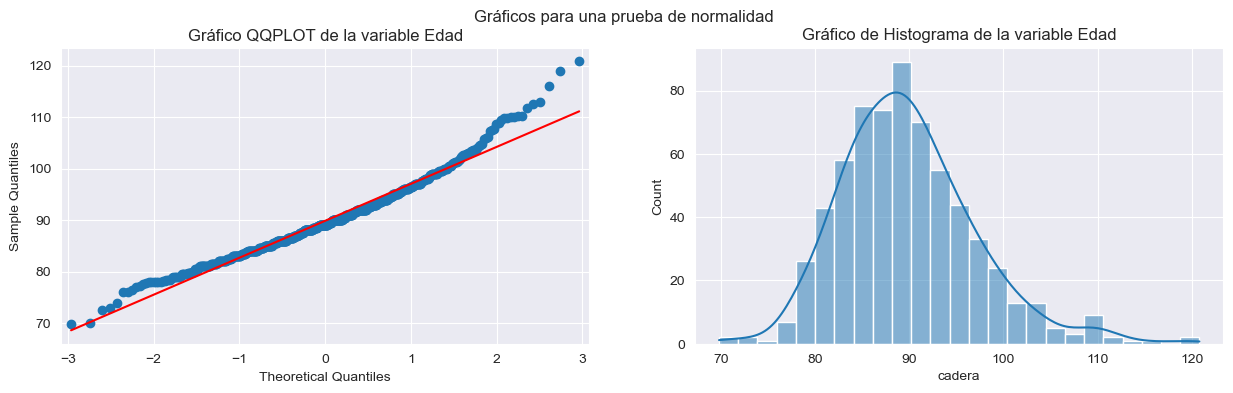

In [97]:
for i, colum in enumerate(variables):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3.84))  # 1 Fila [0]
    fig.suptitle('Gráficos para una prueba de normalidad')

    axes[0].set_title('Gráfico QQPLOT de la variable Edad')
    axes[1].set_title('Gráfico de Histograma de la variable Edad')

    qqplot(subdf_stdr[colum] , line='s', ax=axes[0])
    sns.histplot(x=colum, data=subdf_stdr, ax=axes[1], kde= True)
    plt.show()

In [98]:
for i, colum in enumerate(variables):
    stat, p = shapiro(subdf_stdr[colum])
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat, p))

    stat2, p2 = kstest(subdf_stdr[colum], 'norm')
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

talla - Estadisticos=0.993, p-value=0.003
talla - Estadisticos=1.000, p-value=0.000
peso_kg - Estadisticos=0.961, p-value=0.000
peso_kg - Estadisticos=1.000, p-value=0.000
IMC - Estadisticos=0.956, p-value=0.000
IMC - Estadisticos=1.000, p-value=0.000
circun_cintura - Estadisticos=0.963, p-value=0.000
circun_cintura - Estadisticos=1.000, p-value=0.000
cadera - Estadisticos=0.972, p-value=0.000
cadera - Estadisticos=1.000, p-value=0.000


## Normalizacion de datos con sklearn

In [99]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
subdf_skler = skler.fit_transform(subdf)
subdf_skler

array([[-0.42331655,  1.69474626,  2.37169139,  2.26928037,  1.13378676],
       [ 1.05394871,  0.48563394, -0.01893464,  0.93730951,  1.4820788 ],
       [-1.02516536, -0.92499711, -0.26462515, -0.36538728, -0.53801505],
       ...,
       [-0.65584905,  0.23669905,  0.11523525,  1.53742825,  0.85515312],
       [ 2.12086251,  3.76920369,  1.52561209,  1.65452459,  1.55173721],
       [-0.10871377,  0.08259649,  0.21594177,  0.51283527,  0.57651949]])

In [100]:
subdf_skler
subdf_skler = pd.DataFrame(
    data=subdf_skler,
    columns=["talla", "peso_kg", "IMC", "circun_cintura", "cadera"])
subdf_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talla           652 non-null    float64
 1   peso_kg         652 non-null    float64
 2   IMC             652 non-null    float64
 3   circun_cintura  652 non-null    float64
 4   cadera          652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


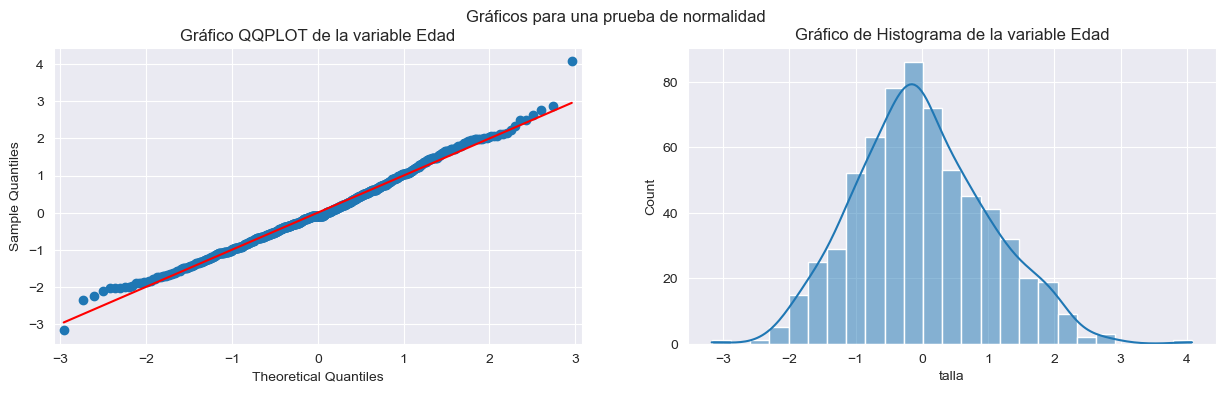

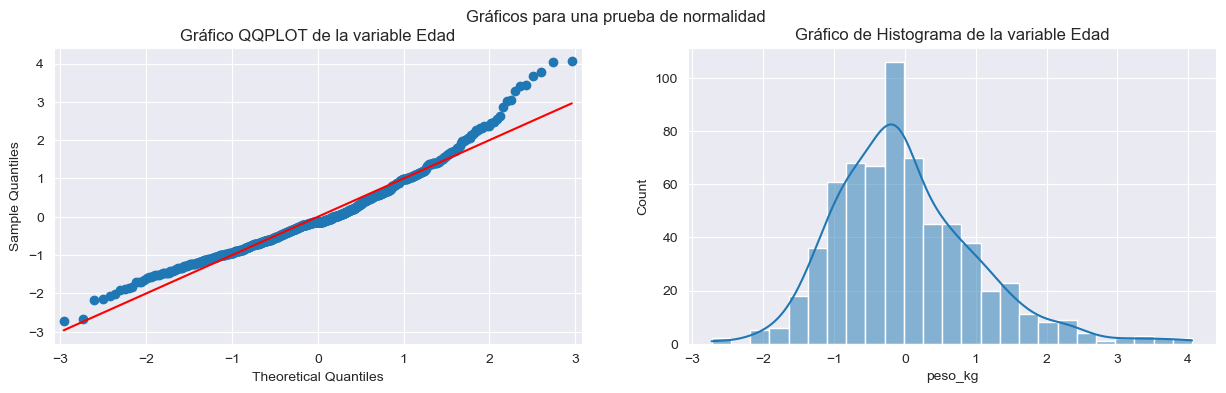

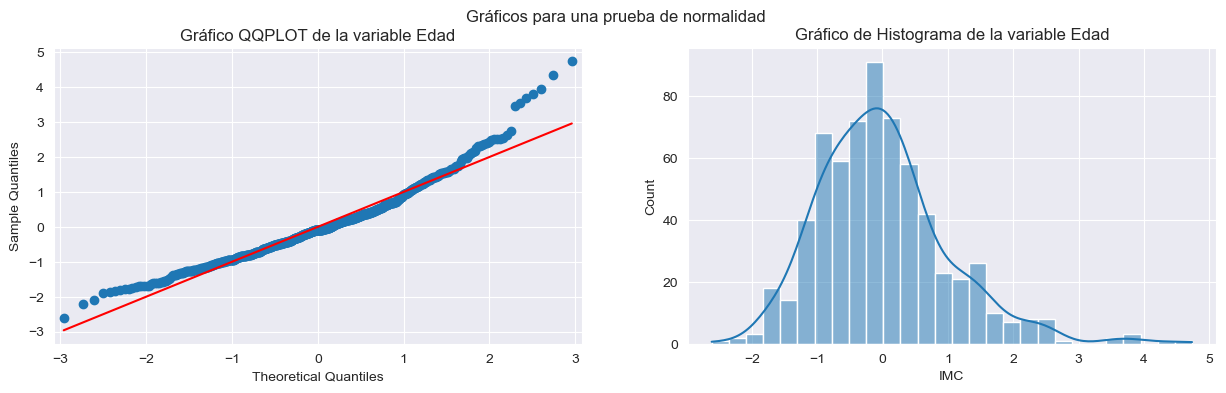

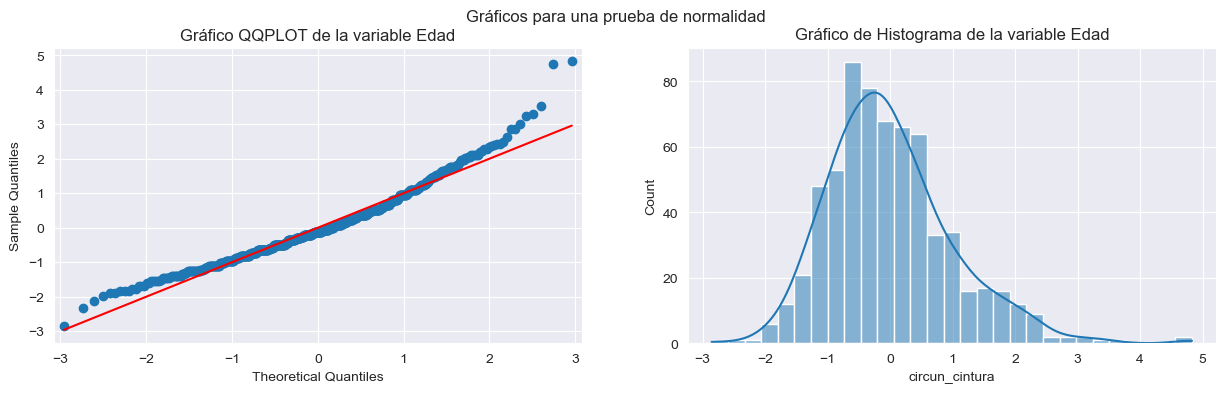

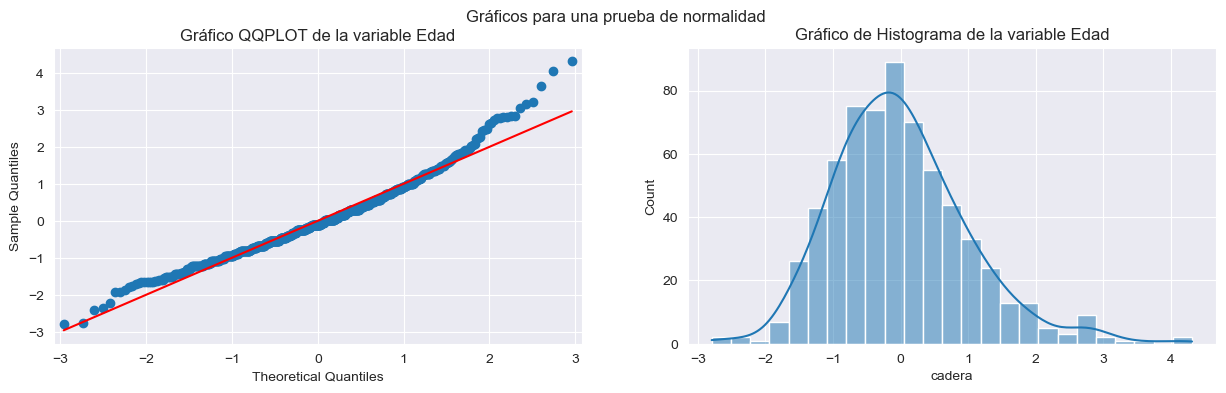

In [101]:
for i, colum in enumerate(variables):
    fig, axes = plt.subplots(1, 2, figsize=(15, 3.84))  # 1 Fila [0]
    fig.suptitle('Gráficos para una prueba de normalidad')

    axes[0].set_title('Gráfico QQPLOT de la variable Edad')
    axes[1].set_title('Gráfico de Histograma de la variable Edad')

    qqplot(subdf_skler[colum] , line='s', ax=axes[0])
    sns.histplot(x=colum, data=subdf_skler, ax=axes[1], kde= True)
    plt.show()

In [102]:
for i, colum in enumerate(variables):
    stat, p = shapiro(subdf_skler[colum])
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat, p))

    stat2, p2 = kstest(subdf_skler[colum], 'norm')
    print(str(colum) + ' - Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

talla - Estadisticos=0.993, p-value=0.003
talla - Estadisticos=0.057, p-value=0.028
peso_kg - Estadisticos=0.961, p-value=0.000
peso_kg - Estadisticos=0.089, p-value=0.000
IMC - Estadisticos=0.956, p-value=0.000
IMC - Estadisticos=0.072, p-value=0.002
circun_cintura - Estadisticos=0.963, p-value=0.000
circun_cintura - Estadisticos=0.078, p-value=0.001
cadera - Estadisticos=0.972, p-value=0.000
cadera - Estadisticos=0.069, p-value=0.004


# Regresion lineal multiple


Variable dependiente: IMC

Variable independiente: x - variables

In [103]:
# Correlación r de pearson
from scipy.stats import pearsonr

r, p = pearsonr(subdf['IMC'], subdf['peso_kg'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.746, p-value=0.000


## Correlaciones

<Axes: >

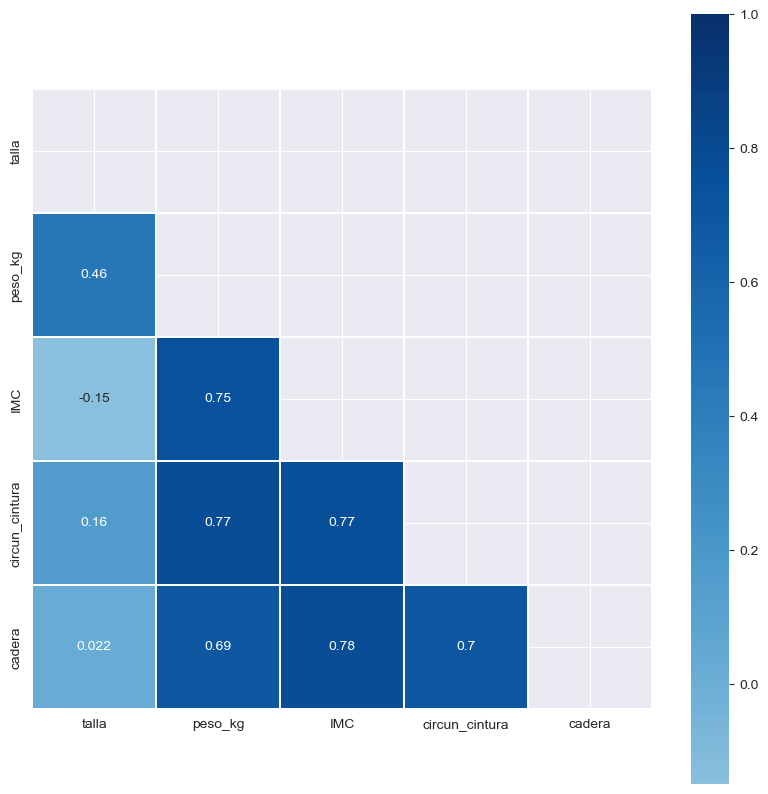

In [104]:

# Graficamos correlación de las variables independientes
correlacion = subdf.corr()

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

## Grafico de distribucion

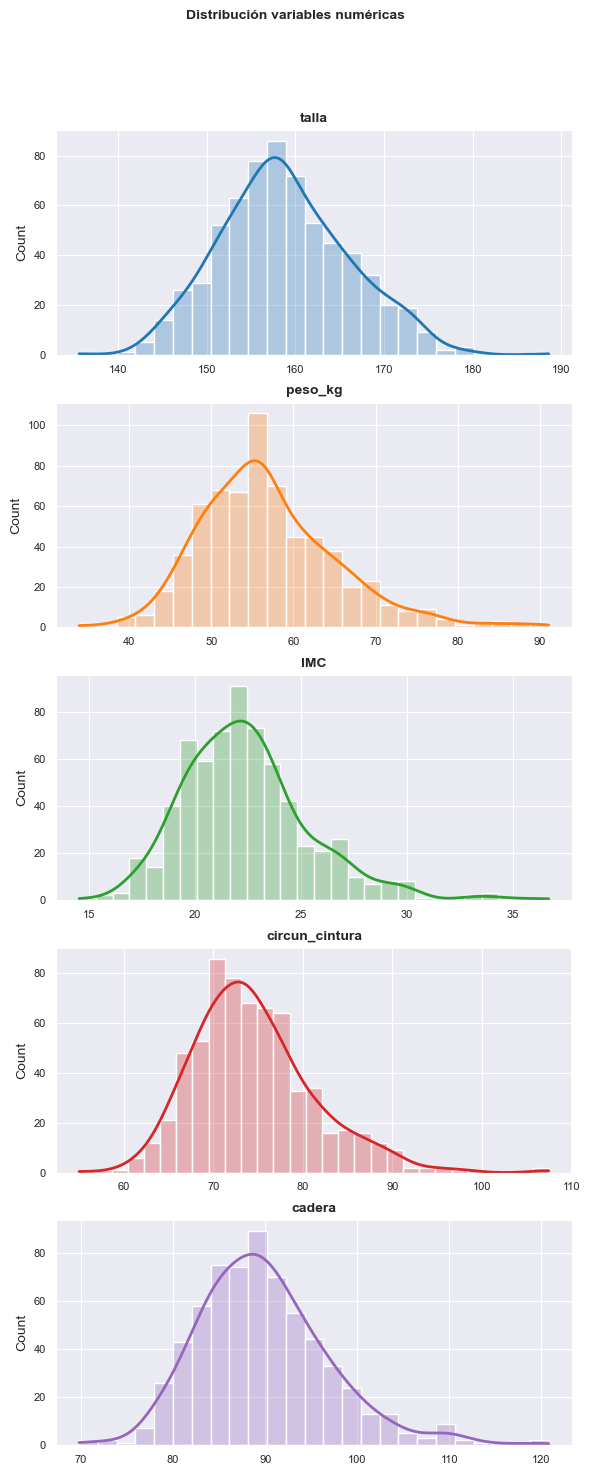

In [105]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))
axes = axes.flat
columnas_numeric = subdf.select_dtypes(include=['float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = subdf,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## Importacion de regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
subdf.info()

In [106]:
# Variables independientes
X_dat = subdf.loc[:, ['talla', 'peso_kg','circun_cintura', 'cadera']]
X_dat.head(6)

,talla,peso_kg,circun_cintura,cadera
0,155.7,71.2,90.0,98.0
1,166.5,61.0,80.9,100.5
2,151.3,49.1,72.0,86.0
3,151.7,54.6,73.6,88.4
4,160.3,58.0,73.6,97.9
5,162.4,70.8,86.5,106.1


In [107]:
# variable dependiente
Y_dat = subdf.loc[:, ['IMC']]
Y_dat.head(6)

,IMC
0,29.576170
1,22.364707
2,21.623567
3,23.117479
4,22.260196
5,26.124451


## Creacion del modelo

In [108]:
modelo = LinearRegression()
modelo.fit(X = X_dat, y = Y_dat)

LinearRegression()

# Informacion del modelo

In [109]:
modelo = sm.OLS(endog=Y_dat, exog=X_dat,) # agregamos una constante al modelo
modelo = modelo.fit()     # ajustamos el modelo. Por default seré a través de Mínimos Cuadrados Ordinarios
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                    IMC   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.552e+04
Date:                Sun, 20 Aug 2023   Prob (F-statistic):                        0.00
Time:                        21:59:22   Log-Likelihood:                         -1119.5
No. Observations:                 652   AIC:                                      2247.
Df Residuals:                     648   BIC:                                      2265.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

## Resultado

El modelo explica el 99.6% de las variabilidades en la variable dependiente IMC. Esto sugiere que el modelo se ajusta muy bien a los datos. Todas las variables en el modelo tienen p-valores muy pequeños (menores que 0.05), lo que indica que son estadísticamente significativas para predecir IMC.